In [8]:
#conda install datasets matplotlib pandas, conda activate python_course
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

#Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

#Data Cleanup

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])



In [11]:
#MERGE DATAFRAMES - pd.merge(df1, df2, on 'index')
df_jobs_data = {
    'job_id': [1, 2, 3, 4, 5],
    'job_title': ['Data Scientist', 'Software Engineer', 'Marketing Manager', 'Financial Analyst', 'HR Coordinator'],
    'company_name': ['ABC Inc.', 'JKL Enterprises', 'DEF Corp.', 'GHI Ltd.', 'MNO Group'],
    'job_location': ['New York', 'San Francisco', 'Los Angeles', 'Chicago', 'Boston']
}

df_jobs = pd.DataFrame(df_jobs_data)

df_jobs.head()

,job_id,job_title,company_name,job_location
0,1,Data Scientist,ABC Inc.,New York
1,2,Software Engineer,JKL Enterprises,San Francisco
2,3,Marketing Manager,DEF Corp.,Los Angeles
3,4,Financial Analyst,GHI Ltd.,Chicago
4,5,HR Coordinator,MNO Group,Boston


In [12]:
df_companies_data = {
    'company_name': ['ABC Inc.', 'DEF Corp.', 'GHI Ltd.', 'JKL Enterprises', 'MNO Group'],
    'industry': ['Technology', 'Retail', 'Manufacturing', 'Finance', 'Healthcare'],
    'company_size': ['Large', 'Medium', 'Small', 'Large', 'Large']
}

df_companies = pd.DataFrame(df_companies_data)

df_companies.head()

,company_name,industry,company_size
0,ABC Inc.,Technology,Large
1,DEF Corp.,Retail,Medium
2,GHI Ltd.,Manufacturing,Small
3,JKL Enterprises,Finance,Large
4,MNO Group,Healthcare,Large


In [14]:
#merging together

df_jobs.merge(df_companies, on = 'company_name')

,job_id,job_title,company_name,job_location,industry,company_size
0,1,Data Scientist,ABC Inc.,New York,Technology,Large
1,2,Software Engineer,JKL Enterprises,San Francisco,Finance,Large
2,3,Marketing Manager,DEF Corp.,Los Angeles,Retail,Medium
3,4,Financial Analyst,GHI Ltd.,Chicago,Manufacturing,Small
4,5,HR Coordinator,MNO Group,Boston,Healthcare,Large


In [23]:
# Filter rows where job_country is United States
df_US = df[df['job_country'] == 'United States'].copy()

# Extract month from job_posted_date and store it in job_posted_month column
df_US['job_posted_month'] = df_US['job_posted_date'].dt.strftime('%B')

# Create pivot table
df_US_pivot = df_US.pivot_table(index='job_posted_month', columns='job_title_short', aggfunc='size')

# Reset index to make job_posted_month a column again
df_US_pivot.reset_index(inplace=True)

# Convert job_posted_month to month number
df_US_pivot['job_posted_month_no'] = pd.to_datetime(df_US_pivot['job_posted_month'], format='%B').dt.month

# Sort by month number
df_US_pivot.sort_values('job_posted_month_no', inplace=True)

# Set job_posted_month as index
df_US_pivot.set_index('job_posted_month', inplace=True)

# Drop job_posted_month_no column
df_US_pivot.drop(columns='job_posted_month_no', inplace=True)

US_data_jobs = df_US_pivot

In [26]:
#2nd dataset

US_software_jobs = pd.read_csv("https://lukeb.co/software_csv", index_col = 'job_posted_month')
US_software_jobs

,Front-End Developer,Back-End Developer,Full-Stack Developer,UI/UX Designer
job_posted_month,,,,
January,13619,9827,5108,4348
February,11456,9116,7298,4284
March,11102,8178,5814,4159
April,14037,9209,7232,4220
May,12126,8864,6718,4980
June,12003,8065,5902,4781
July,11914,8061,6839,4344
August,11571,8191,7413,4104
September,14016,8447,6139,4094


In [28]:
US_datasoftware_jobs = US_data_jobs.merge(US_software_jobs, on = "job_posted_month")

In [35]:
top_5 = (US_datasoftware_jobs
         .sum()
         .sort_values(ascending=False)
         .head().index
         .to_list())
top_5

['Front-End Developer',
 'Back-End Developer',
 'Full-Stack Developer',
 'Data Analyst',
 'Data Scientist']

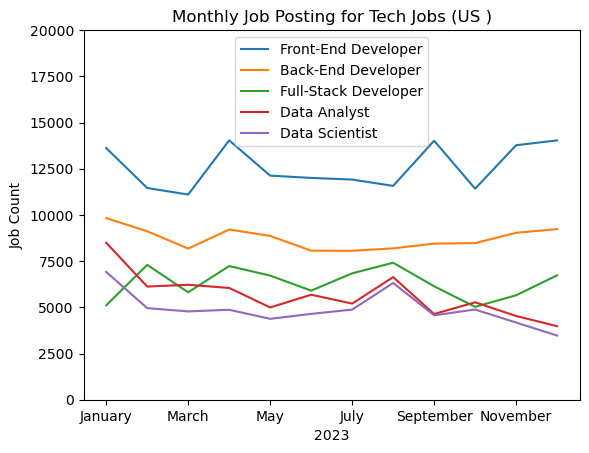

In [37]:
US_datasoftware_jobs[top_5].plot(kind = 'line')
plt.ylabel('Job Count')
plt.xlabel ('2023')
plt.title('Monthly Job Posting for Tech Jobs (US )')
plt.ylim(0,20000)
plt.legend()
plt.show()